# This page shows some of the waveforms generated using a trained autoencoder

## The waveforms used to train the autoencoder are from:
### 1. Andresen, et al, 2016  (4 waveforms) https://arxiv.org/abs/1607.05199
### 2. Andresen, et al, 2019  (6 waveforms) https://arxiv.org/abs/1810.07638
### 3. Radice, et al, 2019       (8 waveforms) https://arxiv.org/abs/1812.07703
### 4. Ott, et al, 2013             (8 waveforms) https://arxiv.org/abs/1210.6674
### 5. Kuroda et al, 2016       (2 waveforms) https://arxiv.org/abs/1605.09215
### 6. Yakunin et al. 2017     (1 waveform) https://arxiv.org/abs/1701.07325
### In total, 29 3D waveforms were used.


## The procedure for generating the training data is as follow:
### 1. The waveforms were resampled at 4096Hz 
###     (For Andresen, et al, 2019, the waveforms were originally sampled at ~2000Hz).
### 2. Tukey window with alpha = 0.08 was then applied to waveforms.
### 3. All the waveforms were padded with zeros to make them 2 second long.
### 4. The padding might also happen in the begining of the waveforms as some of them did not originally start at t = 0. 
###     This step was to make sure that all waveforms start at time = zeros, which was also supposed to be the time at bounce.
### 5. To augment the data, 10 times shifts from the range (-0.4s, 0) were applied to the waveforms, increasing the waveform numbers by 10 fold (29 waveforms X 10 time shifts)
### 6. 10 phase shifts from the range (0, pi/6) were applied to the waveforms in the frequency domain, increasing the waveforms by 10 fold (29 waveforms X 10 time shifts X 10 phase shift)
### 7. 10 magnitude scale factors from the range (0.1, 1.0) were applied to the waveforms by multiplying the amplitudes by the scale factors. 
### 8. Step No. 7 makes the total waveform samples equal to 29 waveform X 10 time shifts X 10 phase shifts X 10 scale factors = 29,000 waveforms
### 9. The input parameters for the autoencoder consisted of 4 parts. 




##     The first part was the progenitor model, this included
###        1. the mass distribution from the core to 15000 km (a 450 element vector)
###        2. the values of radius at each of the 450 elements
###        3. the average electrons per baryon at each of the 450 elements
###        4. the velocity of the cell at each of the 450 elements
###        5. the average density at each of the 450 elements
###        6. the average temperature at each of the 450 elements       
###        7. the average pressure at each of the 450 elements
###        8. the average specific energy at each of the 450 elements
###        9. the average angular velocity at each of the 450 elements
###      10. the average mean mass number of nuclei at each of the 450 elements

##      The second part of the input was tabulated form of the EOS (equation of state) (This part of the input was an 12 by 34 by 55 array:
###        1. 12 values of electron fractions
###        2. 34 values of log of temperature
###        3. 55 values of density

##      The third part of the input was simulation specific. This part concerned solving the hydrodynamics and the Boltzmann equation.
###      This input takes the form of a 3 x 5 matrix:
###        1. the first row concerns what hydrodynamices module was used in a simulation
###        2. the second row concerns what neutrino transport scheme was used in a simulation
###        3. the third row concerns whether ray by ray scheme was used
###      This is similar to the labels for a convolutional neural network, where a sample of class 1 would have a label = [1, 0, 0, 0, 0] in a situation where there are 5 classes.
###       For example, for Andresen, et al, 2016, this part of the input is:
###       [1.0,	    0.0,	0.0,	0.0,	0.0
###        1.0,	    0.0,	0.0,	0.0,	0.0
###        1.0, 	0.0,	0.0,	0.0,	0.0]

##      The fourth part of the input was a vector of 6 elements.
###        1. neutrino heating
###        2. strange quark 
###        3. observing angle
###        4. time shift factor
###        5. phase shift factor
###        6. amplitude scaling factor

###  64 of these waveform samples were randomly drawn and used for validation, 26944 for training, and the rest (1992) for testing.

## things to note
### 1. compared to the results shown on https://github.com/manleongchan/Super-gen/blob/master/Mar-26-results-on-14-waveforms.ipynb, the samples waveforms used for the results on the page:
###     sampled only from two observing angles, equatorial and polar, while it was 4 observing angles for  Ott, et al, 2013  previously.

## Below are some of the results obtained by applying the trained autoencoder to the test samples.

In [1]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

## To quantify how good the reconstruction of a waveform is, a quantity, referred to as the correlation factor, defined below, was used,

## $C = \frac{(h^{r}, h^{t})}{\sqrt{(h^{r} , h^{r}) (h^{t}, h^{t})}}$
## where C is the correlation factor, $h^{r}$ is the reconstruted waveform from the trained autoencoder, and $h^{t}$ the target waveform 
## and $(,)$ is the scalar product between two waveforms, given by
## $(a, b) = \int a(t)b(t)dt$

## The range for this value is [-1, 1]. 
## a correlation factor of 1 means a perfect matching, -1 opposite matching



## Figure 1. 
### The distribution of the correlation factors for all testing samples.
### For referemce, between 0.71 and 9

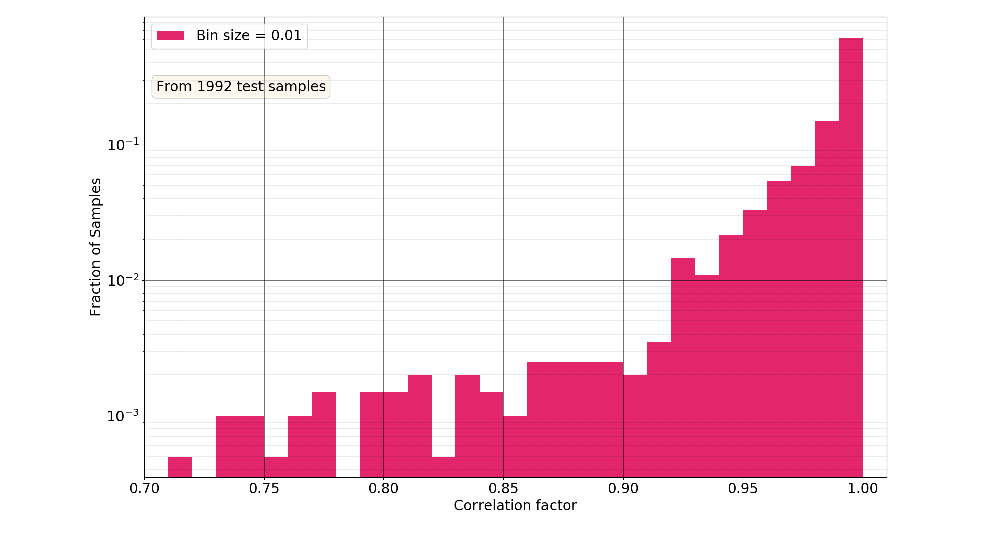

In [2]:

fig = plt.figure(figsize=(26.5,15.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('../t2/Correlation_factor_distribution_log.png') 
plt.imshow(x)
plt.axis('off')

plt.show()

## Figure 2. 
### The result with the highest correlation factor
### the waveform was simulated by Radice , et al, 2019, assuming a non-rotating of 19 $M_\odot$,  and extracted assuming an equatorial observer,


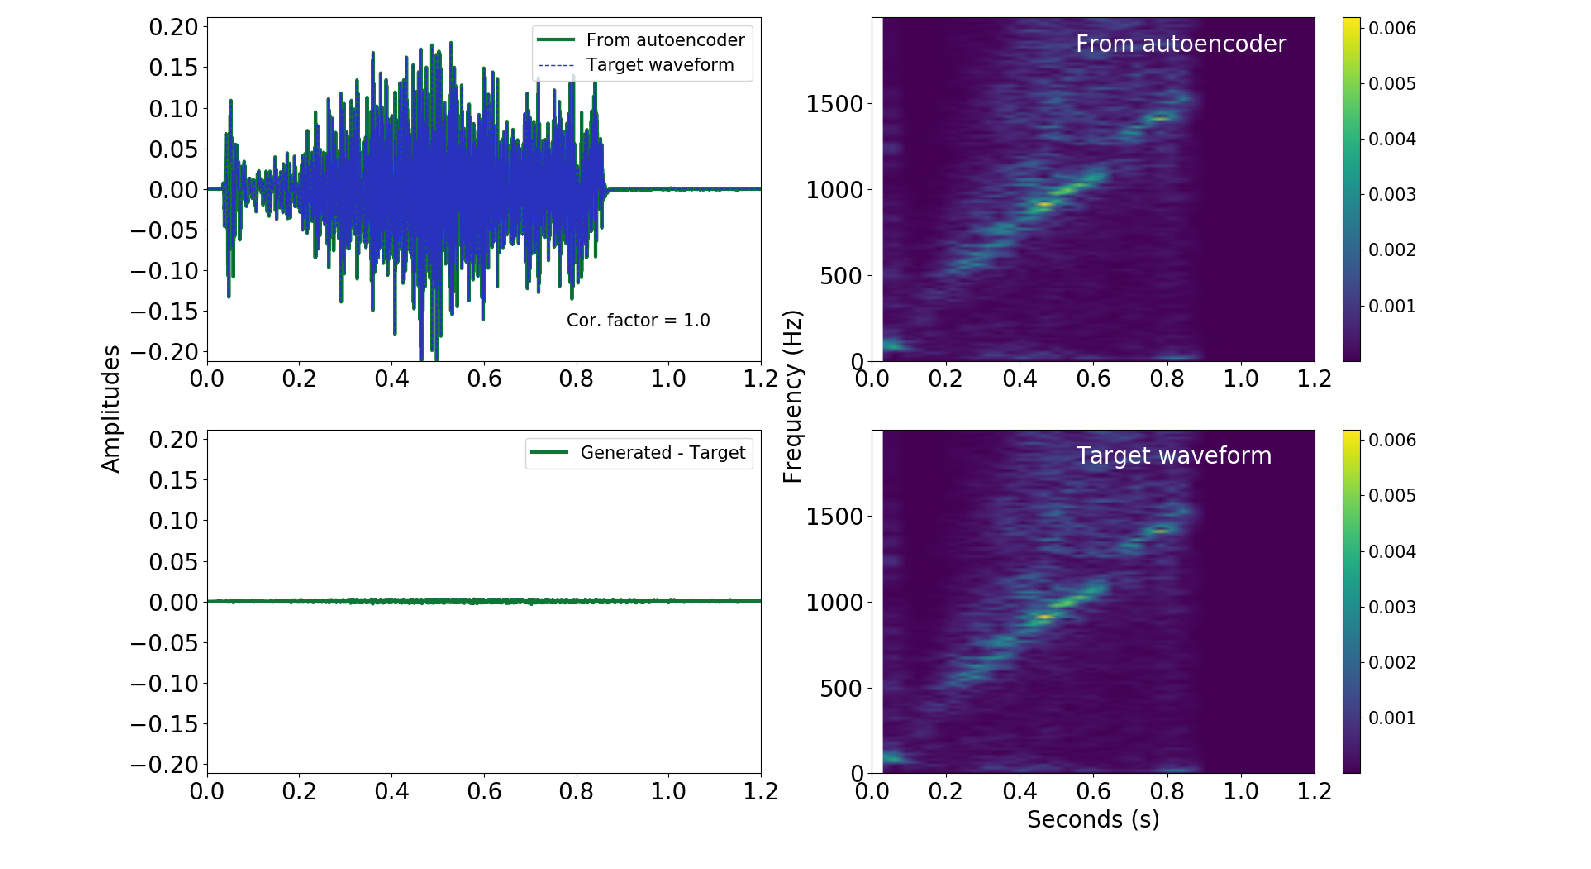

In [3]:
fig = plt.figure(figsize=(43.5,20.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('../t2/Example_with_cf_0.9998877911382664.png') 
plt.imshow(x)
plt.axis('off')

plt.show()

## Figure 3. 
### The result with the lowest correlation factor
### the waveform was simulated by Andresen, et al, 2019, assuming a rotating progenitor of 15 $M_\odot$,  and extracted assuming a polar observer,


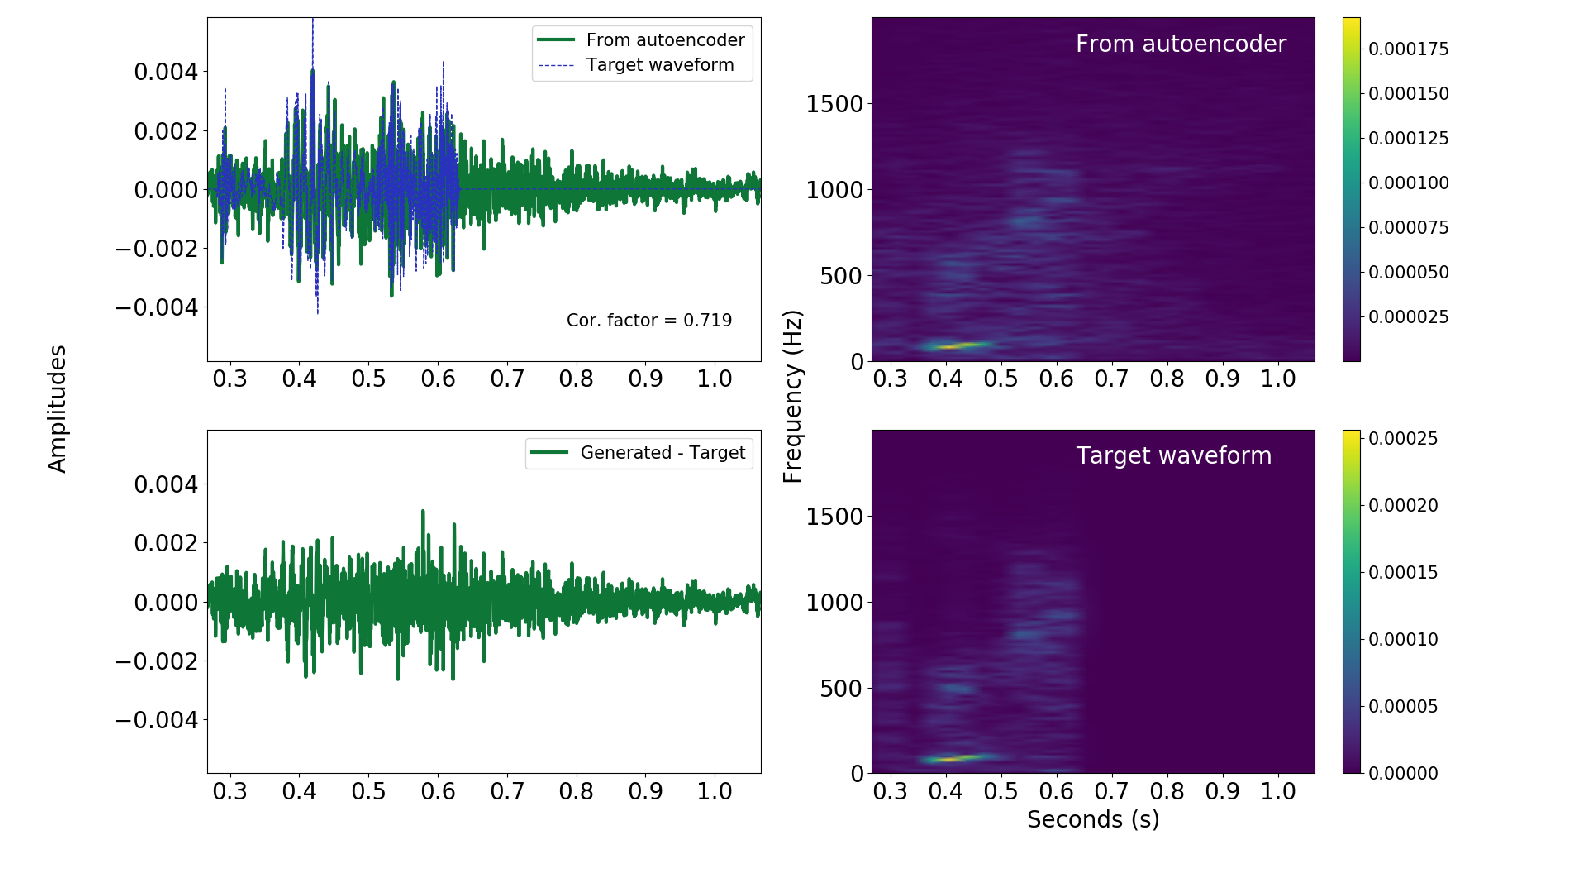

In [4]:
fig = plt.figure(figsize=(43.5,20.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('../t2/Example_with_cf_0.7191187418969162.png') 
plt.imshow(x)
plt.axis('off')

plt.show()

## Figure 4. 
### the waveform was simulated by Radice , et al, 2019, assuming a non-rotating progenitor of 9 $M_\odot$,  and extracted assuming an equatorial observer,


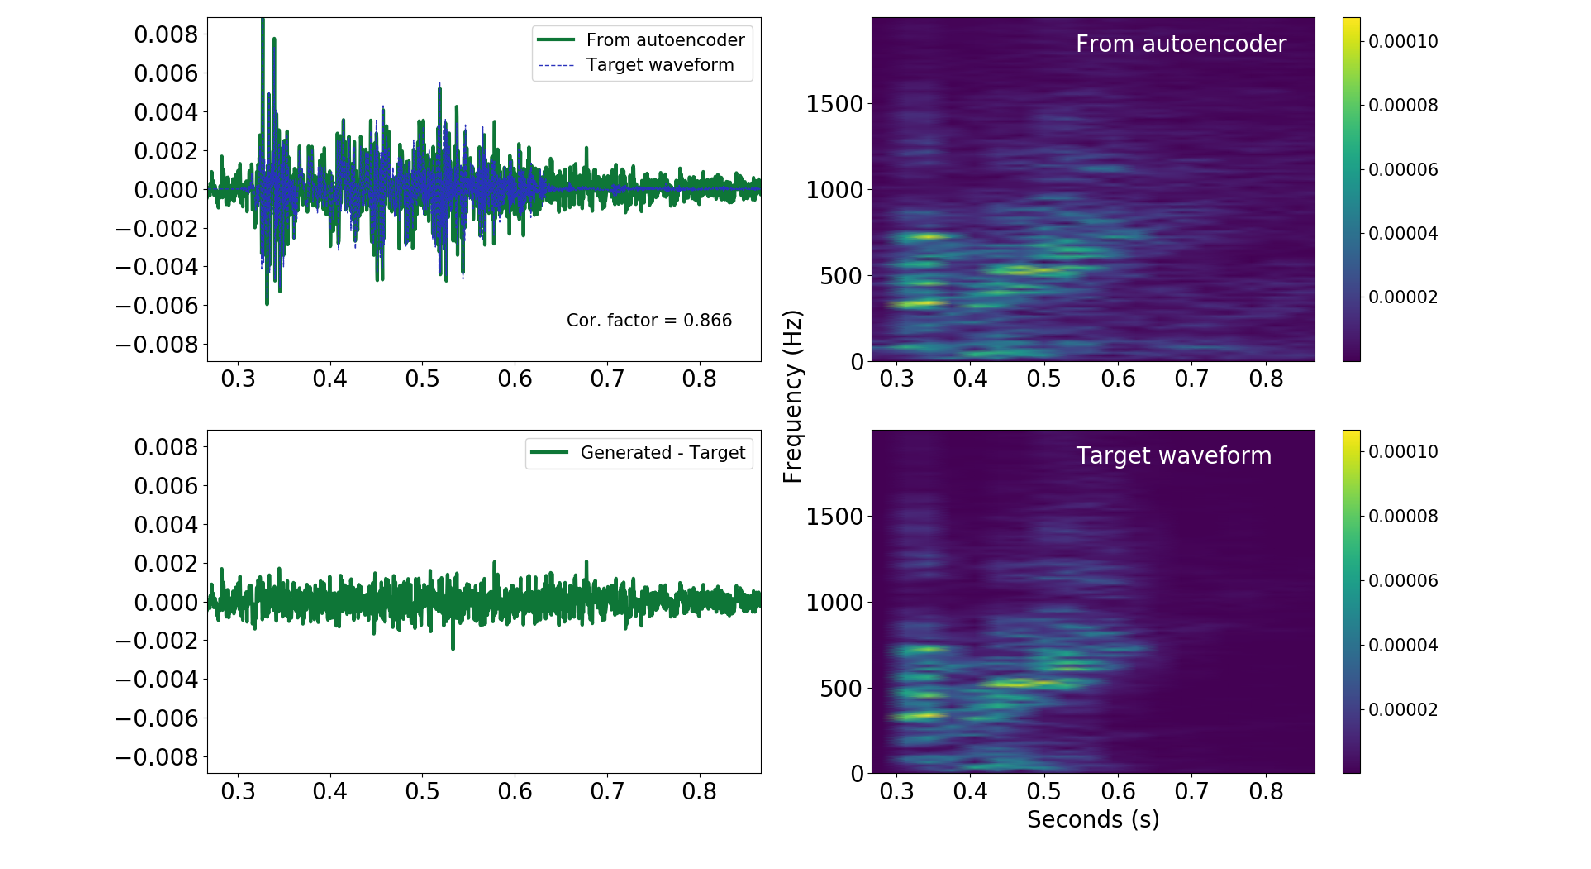

In [5]:
fig = plt.figure(figsize=(43.5,20.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('../t2/Example_with_cf_0.8658874117484283.png') 
plt.imshow(x)
plt.axis('off')

plt.show()